In [62]:
import pandas as pd
import numpy as np

In [63]:
df_post=pd.read_json('data_page/posts/posts_1.json')
df_post.head(3)

,timestamp,attachments,data,title,tags
0,2020-11-02 16:46:15,"[{'data': [{'place': {'name': 'Capitol Hill', ...","[{'post': 'ðºð¸ MaÃ±ana es 3 de noviembre,...",NaN,NaN
1,2020-10-23 15:07:42,[{'data': [{'place': {'name': 'Nordkapp 71Âº 1...,"[{'post': 'North Cape o en noruego, #Nordkapp,...",NaN,NaN
2,2020-10-03 15:33:29,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'DespuÃ©s de unos dÃ­as de reposo pa...,NaN,NaN


In [64]:
df_post.shape

(334, 5)

In [65]:
df_post.columns

Index(['timestamp', 'attachments', 'data', 'title', 'tags'], dtype='object')

In [66]:
df_post['attachments'].count().sum()

227

In [67]:
df_post.rename(columns={'timestamp':'date'}, inplace=True)

In [68]:
df_post.columns

Index(['date', 'attachments', 'data', 'title', 'tags'], dtype='object')

In [69]:
df=df_post.drop(['attachments','title','tags'], axis=1)

In [70]:
pd.to_datetime(df['date'])
df.head(4)

,date,data
0,2020-11-02 16:46:15,"[{'post': 'ðºð¸ MaÃ±ana es 3 de noviembre,..."
1,2020-10-23 15:07:42,"[{'post': 'North Cape o en noruego, #Nordkapp,..."
2,2020-10-03 15:33:29,[{'post': 'DespuÃ©s de unos dÃ­as de reposo pa...
3,2020-09-27 22:47:29,[{'post': 'Unos cuantos cientos de metros de d...


In [71]:
df.shape

(334, 2)

In [72]:
# grouping by months

In [73]:
df=df.set_index('date')
post_counts=df['data'].resample('MS').size()
post_counts

date
2015-08-01    17
2015-09-01     7
2015-10-01    12
2015-11-01     6
2015-12-01     4
              ..
2020-07-01     4
2020-08-01     4
2020-09-01     2
2020-10-01     2
2020-11-01     1
Freq: MS, Name: data, Length: 64, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


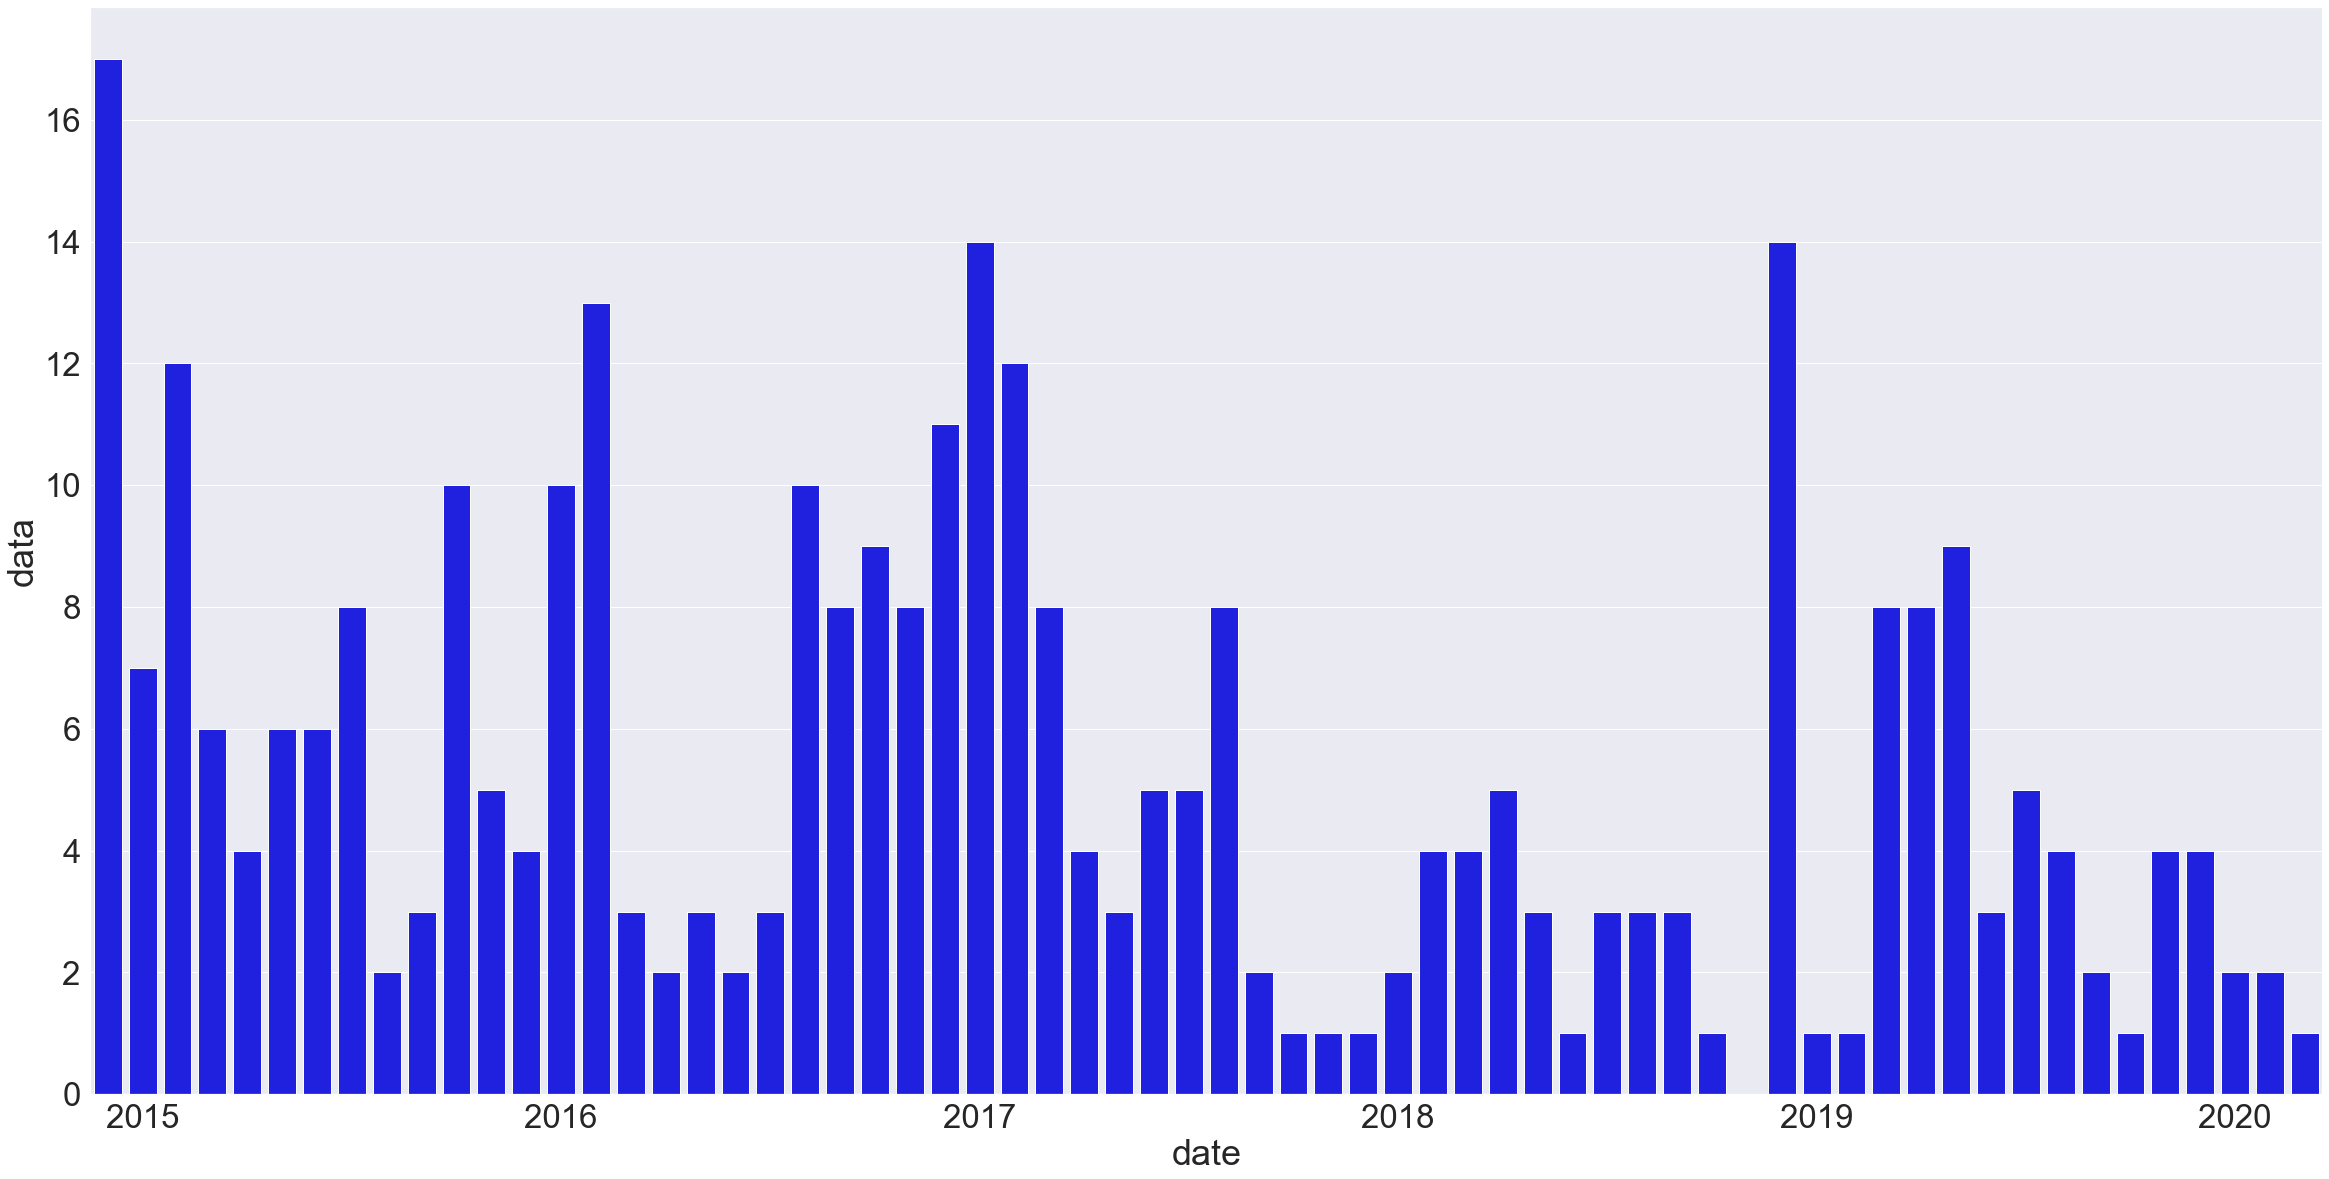

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(1, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

In [75]:
plt.savefig('page_posts_by_months.png')

<Figure size 2880x1440 with 0 Axes>

In [76]:
#now by years

In [77]:
year_post_counts=df['data'].resample('YS').size()
year_post_counts

date
2015-01-01    46
2016-01-01    72
2017-01-01    92
2018-01-01    41
2019-01-01    46
2020-01-01    37
Freq: AS-JAN, Name: data, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


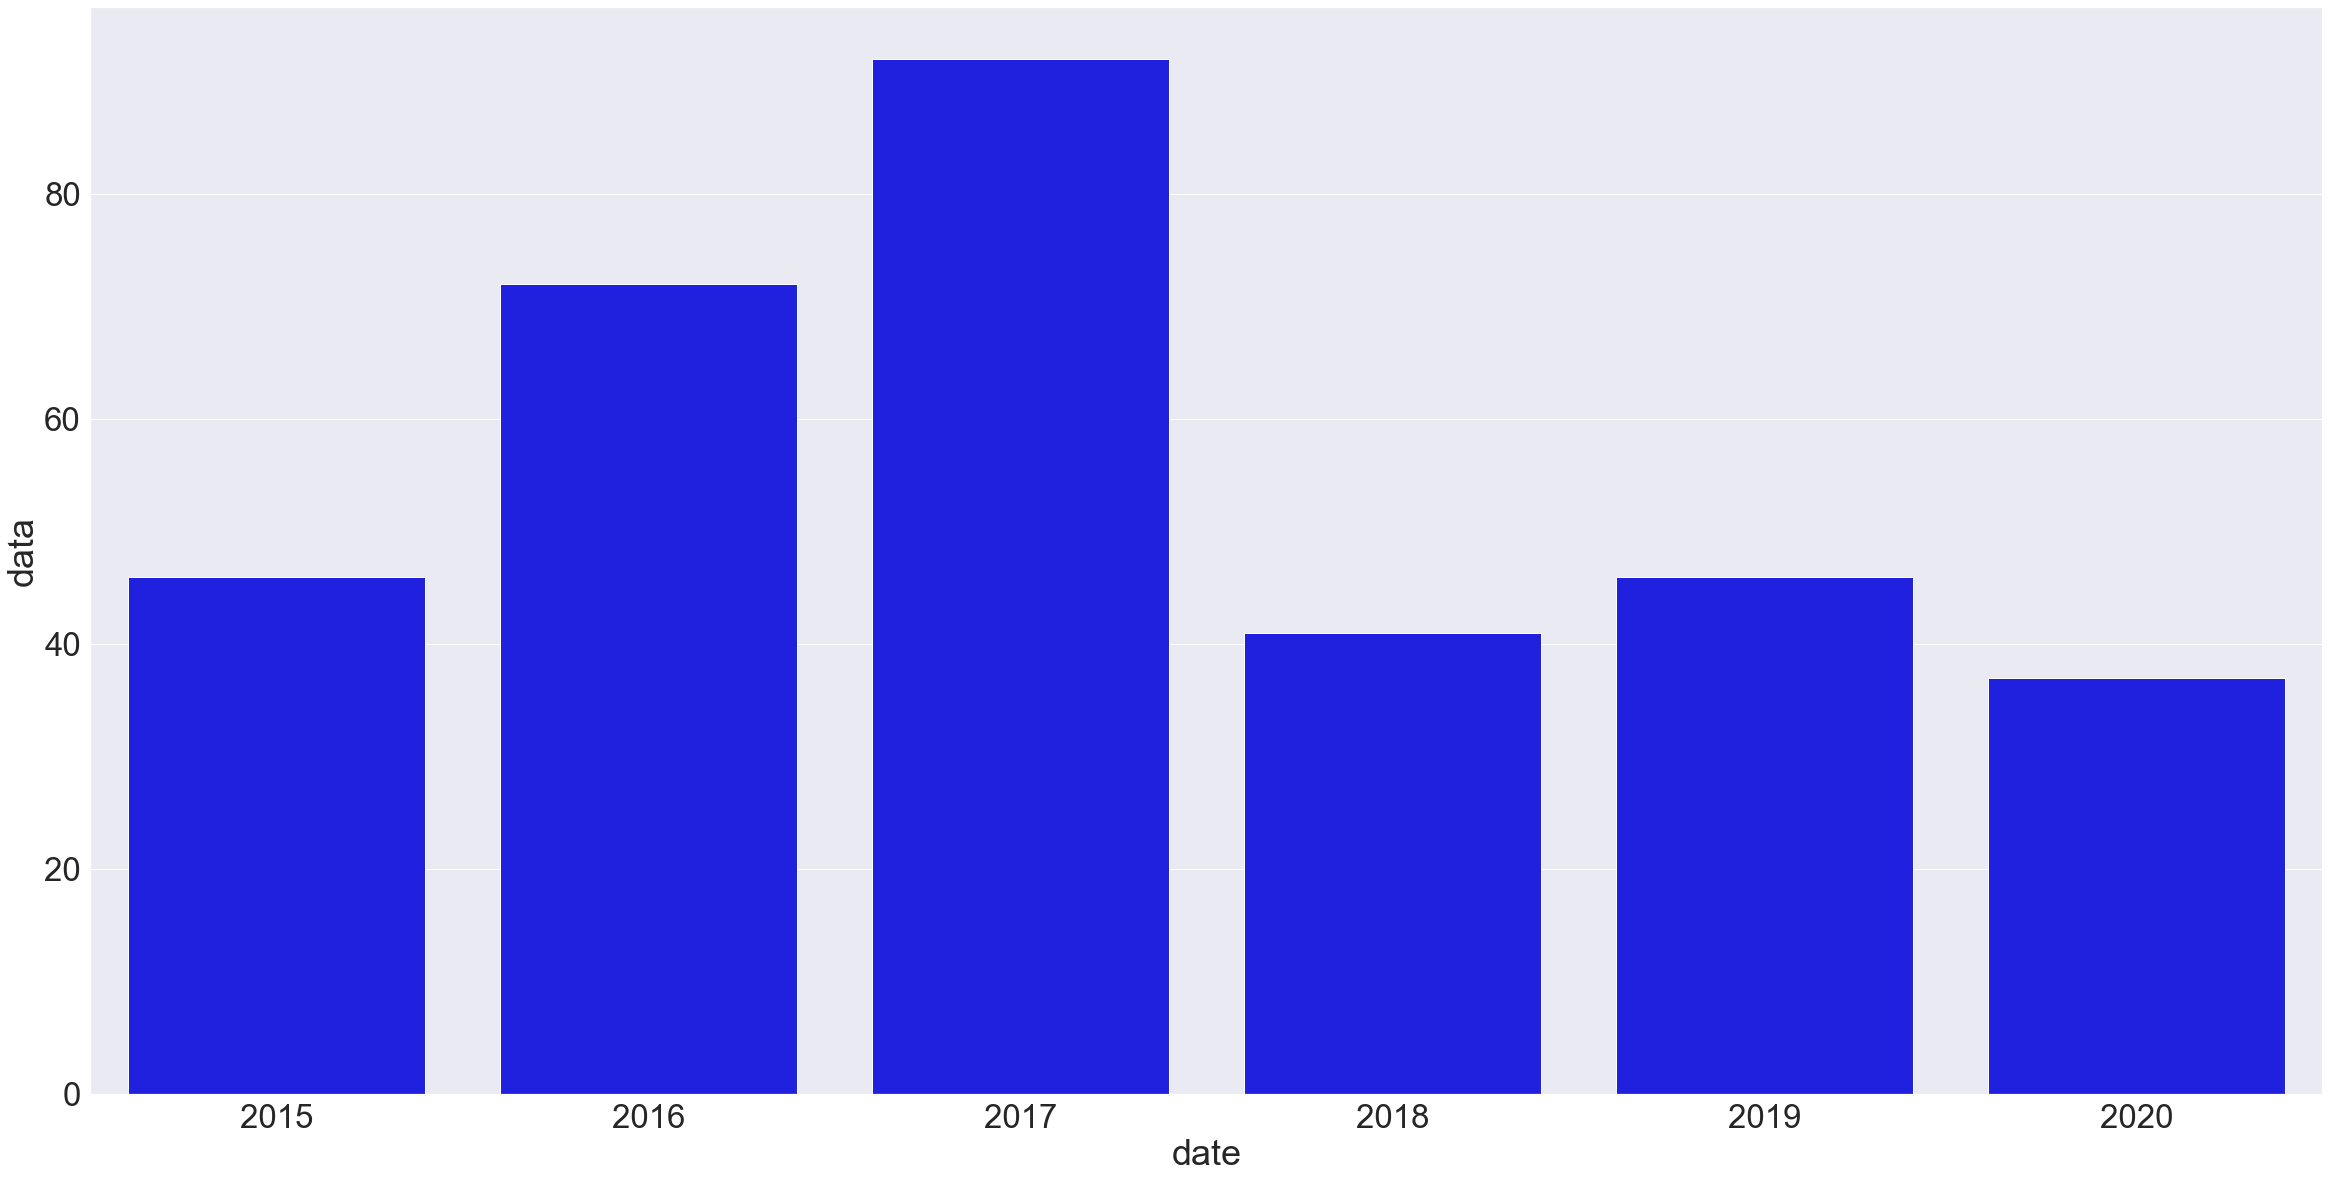

In [78]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = year_post_counts.index

#create bar plot
sns.barplot(x_labels, year_post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(0, len(x_labels), step=1)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

In [79]:
plt.savefig('page_posts_by_years.png')

<Figure size 2880x1440 with 0 Axes>

In [80]:
df11=df_post['data'].to_dict()

In [81]:
df11

{0: [{'post': 'ð\x9f\x87ºð\x9f\x87¸ MaÃ±ana es 3 de noviembre, un dÃ\xada realmente importante en Estados Unidos. Las #Elecciones2020 decidirÃ¡n el futuro no solo de una de las potencias mÃ¡s importantes, sino de las relaciones y la cooperaciÃ³n internacional para los prÃ³ximos 4 aÃ±os.\n\nVisitar la capital de EEUU te hace aprender y descubrir mucha historia, pero tambiÃ©n contrasta con la naturalidad que se desarrollan otras ciudades de la costa Este. Mi momento favorito fue conocer el Capitolio por dentro, cÃ³mo se construyÃ³ y lo que representa.\nhttps://youtu.be/cxyMyFor0WY'},
  {'update_timestamp': 1604335575}],
 1: [{'post': 'North Cape o en noruego, #Nordkapp, es el Cabo Norte, el extremo de Europa, el lÃ\xadmite del continente. Se encuentra en Noruega, y considerado parte de Laponia, alberga un ambiente extremo sobre todo en invierno, cuando las temperaturas alcanzan los -20ÂºC y viajar allÃ\xad es casi misiÃ³n imposible.\nEl viaje a Laponia comenzÃ³ en Ivalo, cuando estaba de

I want to check how many values of these dictionaries have no value

In [82]:
df12nan = [k for k, v in df11.items() if v is np.nan] 

In [83]:
df12nan

[100,
 130,
 131,
 132,
 133,
 135,
 137,
 138,
 139,
 140,
 142,
 144,
 145,
 146,
 147,
 149,
 151,
 152,
 161,
 163,
 164,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 177,
 178,
 179,
 183,
 186,
 188,
 190,
 192,
 193,
 194,
 195,
 197,
 201,
 202,
 203,
 205,
 213,
 214,
 216,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 247,
 252,
 253,
 257,
 258,
 285,
 293,
 294,
 296,
 298,
 300,
 301,
 303,
 304,
 305,
 315,
 317,
 321,
 323,
 324,
 327,
 329,
 333]

Now I will just maintain those entries with values

In [84]:
df12 = {k:v for k,v in df11.items() if v is not np.nan}

In [85]:
df12

{0: [{'post': 'ð\x9f\x87ºð\x9f\x87¸ MaÃ±ana es 3 de noviembre, un dÃ\xada realmente importante en Estados Unidos. Las #Elecciones2020 decidirÃ¡n el futuro no solo de una de las potencias mÃ¡s importantes, sino de las relaciones y la cooperaciÃ³n internacional para los prÃ³ximos 4 aÃ±os.\n\nVisitar la capital de EEUU te hace aprender y descubrir mucha historia, pero tambiÃ©n contrasta con la naturalidad que se desarrollan otras ciudades de la costa Este. Mi momento favorito fue conocer el Capitolio por dentro, cÃ³mo se construyÃ³ y lo que representa.\nhttps://youtu.be/cxyMyFor0WY'},
  {'update_timestamp': 1604335575}],
 1: [{'post': 'North Cape o en noruego, #Nordkapp, es el Cabo Norte, el extremo de Europa, el lÃ\xadmite del continente. Se encuentra en Noruega, y considerado parte de Laponia, alberga un ambiente extremo sobre todo en invierno, cuando las temperaturas alcanzan los -20ÂºC y viajar allÃ\xad es casi misiÃ³n imposible.\nEl viaje a Laponia comenzÃ³ en Ivalo, cuando estaba de

As some of the nested dictionaries have more than the "post" entry, the one called "update_timestamp", I will go through each entry to remove the keys desired

In [86]:
for _, val in df12.items():
    for i, items in enumerate(val):
        if 'update_timestamp' in items:
            del val[i]

In [87]:
df12

{0: [{'post': 'ð\x9f\x87ºð\x9f\x87¸ MaÃ±ana es 3 de noviembre, un dÃ\xada realmente importante en Estados Unidos. Las #Elecciones2020 decidirÃ¡n el futuro no solo de una de las potencias mÃ¡s importantes, sino de las relaciones y la cooperaciÃ³n internacional para los prÃ³ximos 4 aÃ±os.\n\nVisitar la capital de EEUU te hace aprender y descubrir mucha historia, pero tambiÃ©n contrasta con la naturalidad que se desarrollan otras ciudades de la costa Este. Mi momento favorito fue conocer el Capitolio por dentro, cÃ³mo se construyÃ³ y lo que representa.\nhttps://youtu.be/cxyMyFor0WY'}],
 1: [{'post': 'North Cape o en noruego, #Nordkapp, es el Cabo Norte, el extremo de Europa, el lÃ\xadmite del continente. Se encuentra en Noruega, y considerado parte de Laponia, alberga un ambiente extremo sobre todo en invierno, cuando las temperaturas alcanzan los -20ÂºC y viajar allÃ\xad es casi misiÃ³n imposible.\nEl viaje a Laponia comenzÃ³ en Ivalo, cuando estaba de Erasmus en University of Helsinki y

In [88]:
df12[40]=[{'post': ''}]
df12[184]=[{'post': ''}]

In [89]:
dffinal=pd.DataFrame(df12)

In [90]:
dffinal

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,322,325,326,328,330,331,332
0,"{'post': 'ðºð¸ MaÃ±ana es 3 de noviembre, ...","{'post': 'North Cape o en noruego, #Nordkapp, ...",{'post': 'DespuÃ©s de unos dÃ­as de reposo par...,{'post': 'Unos cuantos cientos de metros de de...,{'post': 'ð¥ð El Pico YordÃ¡s estÃ¡ muy c...,{'post': 'ððð Â¿QuÃ© es un Mahout? Â¿...,{'post': 'QuiÃ©nes son estas personas y por qu...,{'post': 'ð What makes this Elephant Sanctu...,{'post': 'Siempre que hace tanto calor me gust...,{'post': 'ð²ð²ð²ð²ðââï¸ El ver...,...,{'post': 'Some timelapses I've taken through a...,{'post': 'If you want to know more about Finla...,{'post': 'Jumping over all the worries.'},"{'post': 'En 1955, una bandada de estorninos s...",{'post': 'London troubles: http://bit.ly/Probl...,{'post': 'En 8 horas subo a un aviÃ³n hacia He...,{'post': 'How to save money and enjoy the ride...,{'post': 'You should do The Way in order not t...,{'post': 'Now you can follow us in twitter to ...,{'post': 'Would you travel to Sweden? Find the...


In [91]:
dffinal=dffinal.T

In [92]:
dffinal['text']= [x['post'] for x in dffinal[0]]
dffinal['character_count']= dffinal['text'].str.len()
dffinal

,0,text,character_count
0,"{'post': 'ðºð¸ MaÃ±ana es 3 de noviembre, ...","ðºð¸ MaÃ±ana es 3 de noviembre, un dÃ­a re...",552
1,"{'post': 'North Cape o en noruego, #Nordkapp, ...","North Cape o en noruego, #Nordkapp, es el Cabo...",716
2,{'post': 'DespuÃ©s de unos dÃ­as de reposo par...,DespuÃ©s de unos dÃ­as de reposo para cuidar l...,451
3,{'post': 'Unos cuantos cientos de metros de de...,Unos cuantos cientos de metros de desnivel has...,189
4,{'post': 'ð¥ð El Pico YordÃ¡s estÃ¡ muy c...,ð¥ð El Pico YordÃ¡s estÃ¡ muy cerca de Ri...,213
...,...,...,...
326,{'post': 'En 8 horas subo a un aviÃ³n hacia He...,En 8 horas subo a un aviÃ³n hacia Helsinki. Ma...,293
328,{'post': 'How to save money and enjoy the ride...,How to save money and enjoy the ride more whil...,239
330,{'post': 'You should do The Way in order not t...,You should do The Way in order not to reach th...,307
331,{'post': 'Now you can follow us in twitter to ...,Now you can follow us in twitter to learn some...,215


In [93]:
s = pd.to_numeric(dffinal['character_count'], errors='coerce')

m1 = (s< 100)
m2 = (s>= 100) & (s< 400)
m3 = (s>= 400)
masks = [m1,m2,m3]
vals = ['short post','normal post','quite long post']

dffinal['size']=np.select(masks, vals, default=1)
dffinal

,0,text,character_count,size
0,"{'post': 'ðºð¸ MaÃ±ana es 3 de noviembre, ...","ðºð¸ MaÃ±ana es 3 de noviembre, un dÃ­a re...",552,quite long post
1,"{'post': 'North Cape o en noruego, #Nordkapp, ...","North Cape o en noruego, #Nordkapp, es el Cabo...",716,quite long post
2,{'post': 'DespuÃ©s de unos dÃ­as de reposo par...,DespuÃ©s de unos dÃ­as de reposo para cuidar l...,451,quite long post
3,{'post': 'Unos cuantos cientos de metros de de...,Unos cuantos cientos de metros de desnivel has...,189,normal post
4,{'post': 'ð¥ð El Pico YordÃ¡s estÃ¡ muy c...,ð¥ð El Pico YordÃ¡s estÃ¡ muy cerca de Ri...,213,normal post
...,...,...,...,...
326,{'post': 'En 8 horas subo a un aviÃ³n hacia He...,En 8 horas subo a un aviÃ³n hacia Helsinki. Ma...,293,normal post
328,{'post': 'How to save money and enjoy the ride...,How to save money and enjoy the ride more whil...,239,normal post
330,{'post': 'You should do The Way in order not t...,You should do The Way in order not to reach th...,307,normal post
331,{'post': 'Now you can follow us in twitter to ...,Now you can follow us in twitter to learn some...,215,normal post


In [94]:
sizes=[(dffinal['size']=='short post').sum(),(dffinal['size']=='normal post').sum(),(dffinal['size']=='quite long post').sum()]

In [95]:
sizes

[32, 177, 39]

In [96]:
labels = 'short post', 'normal post', 'quite long post'
explode = (0,0.01, 0)

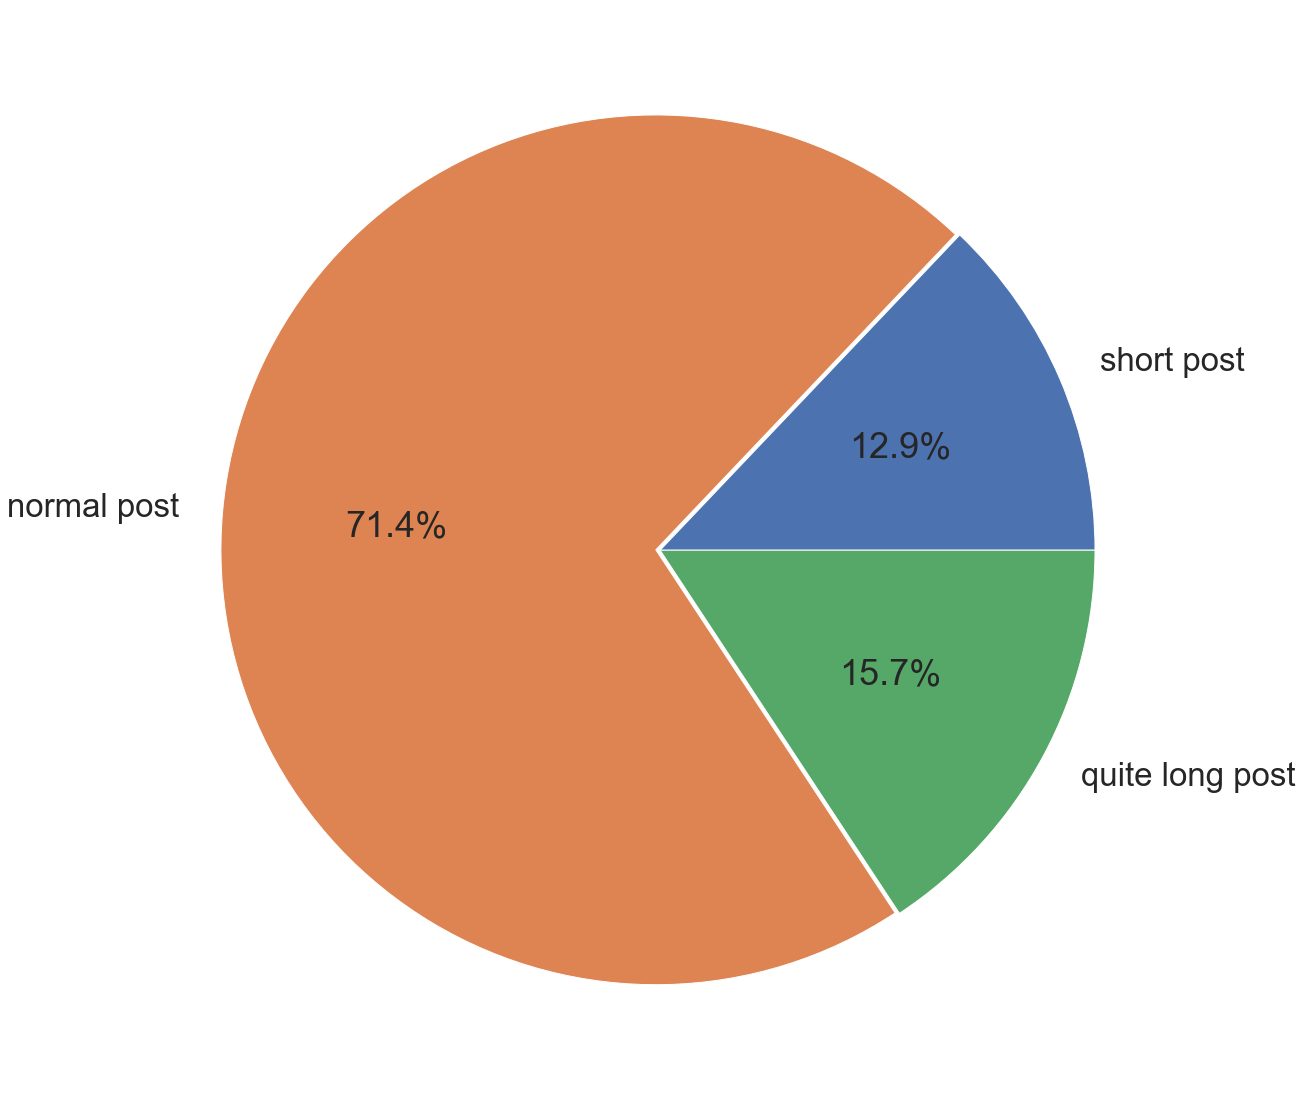

<Figure size 720x288 with 0 Axes>

In [97]:
fig4, ax4 = plt.subplots()
ax4.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%')
plt.figure(figsize=(10,4))
plt.show()

In [98]:
plt.savefig('page_post_lenght_chart.png')

<Figure size 2880x1440 with 0 Axes>